In [ ]:
import cv2
import numpy as np

# 加载图像
image_path = './111.png'
image = cv2.imread(image_path)

# 定义颜色范围 (使用 HSV 格式)
# 根据扫雷游戏常见颜色来设置范围，这些范围可以根据实际图像进一步调整
color_ranges = {
    '1': ((102, 159, 199), (122, 199, 255)),  # 将范围设为中心值的 ±10、±20 和 ±30
    '2': ((82, 165, 82), (102, 185, 102)),  # 绿色范围
}

# 初始化矩阵
num_rows, num_cols = 16, 30
matrix = [['H' for _ in range(num_cols)] for _ in range(num_rows)]

# 将图像转换为 HSV 颜色空间
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# 定义网格单元的大小
cell_height = hsv_image.shape[0] // num_rows
cell_width = hsv_image.shape[1] // num_cols

# 遍历每个网格单元并进行颜色检测
for row in range(num_rows):
    for col in range(num_cols):
        # 计算每个单元格的坐标
        x_start = col * cell_width
        y_start = row * cell_height
        x_end = x_start + cell_width
        y_end = y_start + cell_height

        # 截取每个单元格区域
        cell = hsv_image[y_start:y_end, x_start:x_end]

        # 初始化标记为隐藏 ('H')
        detected_value = 'H'
        
        # 检测每种颜色范围，并确定数字
        for num, (lower, upper) in color_ranges.items():
            # 创建掩膜来检测颜色范围内的像素
            mask = cv2.inRange(cell, np.array(lower), np.array(upper))
            # 如果检测到足够多的像素，则认为该单元格包含该数字
            if cv2.countNonZero(mask) > (cell_height * cell_width * 0.1):  # 20% 以上像素符合颜色范围
                detected_value = num
                break
        
        # 将检测到的值填入矩阵
        matrix[row][col] = detected_value


In [ ]:
# 打印矩阵，每行作为一行输出
for row in matrix:
    print(' '.join(row))


In [ ]:
# 遍历每个网格单元并进行颜色检测
for row in range(num_rows):
    for col in range(num_cols):
        # 计算每个单元格的坐标
        x_start = col * cell_width
        y_start = row * cell_height
        x_end = x_start + cell_width
        y_end = y_start + cell_height

        # 截取每个单元格区域
        cell = hsv_image[y_start:y_end, x_start:x_end]

        # 计算平均颜色值
        avg_color = cv2.mean(cell)[:3]  # 提取平均颜色的 HSV 值

        # 初始化标记为隐藏 ('H')
        detected_value = 'H'
        
        # 检测每种颜色范围，并确定数字
        for num, (lower, upper) in color_ranges.items():
            # 创建掩膜来检测颜色范围内的像素
            mask = cv2.inRange(cell, np.array(lower), np.array(upper))
            # 如果检测到足够多的像素，则认为该单元格包含该数字
            if cv2.countNonZero(mask) > (cell_height * cell_width * 0.1):  # 20% 以上像素符合颜色范围
                detected_value = num
                break
        
        # 将检测到的值和平均颜色填入矩阵
        matrix[row][col] = (detected_value, avg_color)  # 存储数字和颜色值

# 打印矩阵及其颜色值
for row in matrix:
    print(row)


In [6]:
import cv2
import numpy as np
import time

# 加载图像
image_path = './crop_map.png'
image = cv2.imread(image_path)

# 定义颜色范围 (使用 HSV 格式)
color_ranges = {
    'F': ((93, 47, 91), (109, 63, 107)),
    '0': ((0, 0, 0), (5, 5, 5)), 
    '1': ((98, 101, 158), (108, 111, 168)),  
    '2': ((72, 91, 108), (82, 101, 118)),   
    '3': ((118, 72, 95), (134, 88, 111)),
    '4': ((109, 69, 91), (125, 85, 107)),
    '5': ((68, 96, 87), (84, 112, 103)),


}

# 初始化矩阵
num_rows, num_cols = 16, 30
matrix = [['H' for _ in range(num_cols)] for _ in range(num_rows)]

# 排除的颜色范围 (BGR格式)
excluded_colors = np.array([[104, 59, 65], [104, 68, 56], [105, 87, 41]])
lower_bounds = excluded_colors - 10  # 下界
upper_bounds = excluded_colors + 10    # 上界

# 将图像转换为 HSV 颜色空间
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
# print(hsv_image)


# 定义网格单元的大小
cell_height = hsv_image.shape[0] // num_rows
cell_width = hsv_image.shape[1] // num_cols

# 遍历每个网格单元并进行颜色检测
for row in range(num_rows):
    for col in range(num_cols):
        # 计算每个单元格的坐标
        x_start = col * cell_width
        y_start = row * cell_height
        x_end = x_start + cell_width
        y_end = y_start + cell_height

        # 截取每个单元格区域
        cell = hsv_image[y_start:y_end, x_start:x_end]

        # 创建一个空掩膜
        mask = np.zeros(cell.shape[:2], dtype=np.uint8)

        # 对每个颜色范围创建掩膜并合并
        for lower_bound, upper_bound in zip(lower_bounds, upper_bounds):
            # 使用 inRange 创建掩膜
            temp_mask = cv2.inRange(cell, lower_bound, upper_bound)
            mask = cv2.bitwise_or(mask, temp_mask)  # 合并掩膜

        # 翻转掩膜：将白色部分变为黑色，黑色部分变为白色
        flipped_mask = cv2.bitwise_not(mask)    

        # 计算平均颜色值，排除掩膜中的像素
        avg_color = cv2.mean(cell, mask=flipped_mask)[:3]  # 提取平均颜色的 HSV 值

        # 初始化标记为隐藏 ('H')
        detected_value = 'H'

        # 根据平均颜色值决定矩阵的值
        for num, (lower, upper) in color_ranges.items():
            h_check = lower[0] <= avg_color[0] <= upper[0]
            s_check = lower[1] <= avg_color[1] <= upper[1]
            v_check = lower[2] <= avg_color[2] <= upper[2]
            
            #print(f"Checking {num}: H: {h_check}, S: {s_check}, V: {v_check}")

            if h_check and s_check and v_check:
                detected_value = num
                break

        # 将检测到的值和平均颜色填入矩阵
        matrix[row][col] = (detected_value, avg_color)  # 存储数字和颜色值
        # matrix[row][col] = detected_value

# # 获取当前时间戳并格式化为文件名
# timestamp = int(time.time())
# file_name = f"{timestamp}.mine"

# # 将输出保存到文件
# with open(file_name, 'w') as file:
#     file.write(f"{num_cols}x{num_rows}x99\n")
#     for row in matrix:
#         file.write("".join(row) + "\n")

# print(f"输出已保存为 {file_name}")

# 打印矩阵的维度
print(f"{num_cols}x{num_rows}x99")

# # 打印矩阵
# for row in matrix:
#     print("".join(row))

    # 打印矩阵及其颜色值
for row in matrix:
    print(row)


30x16x99
[('0', (0.0, 0.0, 0.0)), ('0', (0.0, 0.0, 0.0)), ('0', (0.0, 0.0, 0.0)), ('H', (103.30088495575221, 114.52212389380531, 171.67256637168143)), ('H', (104.21584699453553, 42.86065573770492, 89.5792349726776)), ('H', (63.961111111111116, 105.3888888888889, 139.72222222222223)), ('H', (101.8743169398907, 49.46448087431694, 113.67213114754098)), ('H', (64.10497237569061, 105.03314917127071, 139.46408839779005)), ('H', (101.47527472527473, 49.60989010989012, 113.96978021978023)), ('H', (104.27272727272727, 42.54545454545455, 89.83939393939394)), ('H', (65.13559322033899, 104.11299435028249, 139.90395480225988)), ('H', (99.38461538461539, 100.4551282051282, 152.80128205128204)), ('H', (103.2809917355372, 112.6611570247934, 172.15702479338844)), ('0', (0.0, 0.0, 0.0)), ('0', (0.0, 0.0, 0.0)), ('H', (64.65248226950355, 104.68085106382979, 138.89361702127658)), ('F', (99.32957746478874, 49.36901408450704, 96.46478873239437)), ('H', (138.43119266055047, 74.1788990825688, 127.389908256880

In [29]:
def modify_vector(input_vector):
    # 取整数部分并加减10
    modified_vector = [(int(x) - 10) for x in input_vector], [(int(x) + 10) for x in input_vector]
    return modified_vector

# 输入向量
input_vector = (99, 83, 94)
output_vector = modify_vector(input_vector)

# 格式化输出
print(f"({output_vector[0][0]}, {output_vector[0][1]}, {output_vector[0][2]}), ({output_vector[1][0]}, {output_vector[1][1]}, {output_vector[1][2]})")


(89, 73, 84), (109, 93, 104)


In [1]:
import cv2
import numpy as np
from collections import Counter

# 加载图像
image_path = './crop_map.png'
image = cv2.imread(image_path)

# 将图像转换为 HSV 颜色空间
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# 定义网格单元的大小
num_rows, num_cols = 16, 30
cell_height = hsv_image.shape[0] // num_rows
cell_width = hsv_image.shape[1] // num_cols

# 遍历每个网格单元并进行颜色检测
for row in range(num_rows):
    for col in range(num_cols):
        # 计算每个单元格的坐标
        x_start = col * cell_width
        y_start = row * cell_height
        x_end = x_start + cell_width
        y_end = y_start + cell_height

        # 截取每个单元格区域
        cell = hsv_image[y_start:y_end, x_start:x_end]

        # 将单元格重塑为一维数组，方便统计颜色
        pixels = cell.reshape(-1, 3)  # 每个像素的 HSV 值
        
        # 使用 Counter 统计颜色出现的次数
        color_count = Counter(map(tuple, pixels))
        
        # 获取出现次数最多的颜色
        most_common_color, most_common_count = color_count.most_common(1)[0]

        # 打印结果
        print(f"Cell ({row}, {col}) - 最多的颜色 (HSV格式): {most_common_color}, 出现次数: {most_common_count}")


Cell (0, 0) - 最多的颜色 (HSV格式): (104, 59, 65), 出现次数: 380
Cell (0, 1) - 最多的颜色 (HSV格式): (104, 59, 65), 出现次数: 361
Cell (0, 2) - 最多的颜色 (HSV格式): (104, 59, 65), 出现次数: 380
Cell (0, 3) - 最多的颜色 (HSV格式): (104, 59, 65), 出现次数: 231
Cell (0, 4) - 最多的颜色 (HSV格式): (104, 46, 83), 出现次数: 240
Cell (0, 5) - 最多的颜色 (HSV格式): (104, 59, 65), 出现次数: 120
Cell (0, 6) - 最多的颜色 (HSV格式): (105, 45, 79), 出现次数: 114
Cell (0, 7) - 最多的颜色 (HSV格式): (104, 59, 65), 出现次数: 101
Cell (0, 8) - 最多的颜色 (HSV格式): (105, 45, 79), 出现次数: 114
Cell (0, 9) - 最多的颜色 (HSV格式): (104, 46, 83), 出现次数: 225
Cell (0, 10) - 最多的颜色 (HSV格式): (104, 59, 65), 出现次数: 103
Cell (0, 11) - 最多的颜色 (HSV格式): (104, 59, 65), 出现次数: 208
Cell (0, 12) - 最多的颜色 (HSV格式): (104, 59, 65), 出现次数: 231
Cell (0, 13) - 最多的颜色 (HSV格式): (104, 59, 65), 出现次数: 361
Cell (0, 14) - 最多的颜色 (HSV格式): (104, 59, 65), 出现次数: 361
Cell (0, 15) - 最多的颜色 (HSV格式): (104, 59, 65), 出现次数: 194
Cell (0, 16) - 最多的颜色 (HSV格式): (104, 46, 83), 出现次数: 180
Cell (0, 17) - 最多的颜色 (HSV格式): (104, 59, 65), 出现次数: 93
Cell (0, 18) - 最多的颜色 

In [2]:
import cv2
import numpy as np
from collections import Counter

# 加载图像
image_path = './crop_map.png'
image = cv2.imread(image_path)

# 将图像转换为 HSV 颜色空间
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# 定义网格单元的大小
num_rows, num_cols = 16, 30
cell_height = hsv_image.shape[0] // num_rows
cell_width = hsv_image.shape[1] // num_cols

# 计算特定单元格 (0, 6) 的坐标
row = 11
col = 0
x_start = col * cell_width
y_start = row * cell_height
x_end = x_start + cell_width
y_end = y_start + cell_height

# 截取特定单元格区域
cell = hsv_image[y_start:y_end, x_start:x_end]

# 将单元格重塑为一维数组，方便统计颜色
pixels = cell.reshape(-1, 3)  # 每个像素的 HSV 值

# 使用 Counter 统计颜色出现的次数
color_count = Counter(map(tuple, pixels))

# 打印所有颜色及其出现次数
print(f"Cell ({row}, {col}) 中的所有颜色及出现次数：")
for color, count in color_count.items():
    print(f"颜色 (HSV): {color}, 出现次数: {count}")


Cell (11, 0) 中的所有颜色及出现次数：
颜色 (HSV): (104, 68, 56), 出现次数: 20
颜色 (HSV): (104, 59, 65), 出现次数: 276
颜色 (HSV): (104, 60, 64), 出现次数: 19
颜色 (HSV): (104, 83, 46), 出现次数: 1
颜色 (HSV): (104, 78, 49), 出现次数: 20
颜色 (HSV): (105, 74, 48), 出现次数: 1
颜色 (HSV): (105, 70, 51), 出现次数: 21
颜色 (HSV): (104, 75, 51), 出现次数: 1
颜色 (HSV): (104, 62, 62), 出现次数: 21
颜色 (HSV): (104, 74, 79), 出现次数: 2
颜色 (HSV): (103, 75, 78), 出现次数: 1
颜色 (HSV): (103, 67, 69), 出现次数: 1
颜色 (HSV): (103, 123, 184), 出现次数: 4
颜色 (HSV): (103, 122, 180), 出现次数: 1
颜色 (HSV): (105, 61, 67), 出现次数: 1
颜色 (HSV): (103, 106, 125), 出现次数: 1
颜色 (HSV): (103, 130, 229), 出现次数: 43
颜色 (HSV): (103, 130, 224), 出现次数: 10
颜色 (HSV): (103, 62, 66), 出现次数: 1
颜色 (HSV): (104, 92, 97), 出现次数: 1
颜色 (HSV): (103, 126, 204), 出现次数: 1
颜色 (HSV): (103, 79, 81), 出现次数: 1
颜色 (HSV): (103, 108, 127), 出现次数: 1
颜色 (HSV): (103, 126, 195), 出现次数: 1
颜色 (HSV): (103, 124, 189), 出现次数: 1
颜色 (HSV): (103, 127, 207), 出现次数: 1
颜色 (HSV): (103, 74, 79), 出现次数: 2
颜色 (HSV): (103, 125, 186), 出现次数: 1
颜色 (HSV): (104, 68,

Cell (0, 0) - 最多的颜色 (BGR格式): (65, 58, 50), 出现次数: 380
Cell (0, 1) - 最多的颜色 (BGR格式): (65, 58, 50), 出现次数: 361
Cell (0, 2) - 最多的颜色 (BGR格式): (65, 58, 50), 出现次数: 380
Cell (0, 3) - 最多的颜色 (BGR格式): (65, 58, 50), 出现次数: 231
Cell (0, 4) - 最多的颜色 (BGR格式): (83, 76, 68), 出现次数: 240
Cell (0, 5) - 最多的颜色 (BGR格式): (65, 58, 50), 出现次数: 139
Cell (0, 6) - 最多的颜色 (BGR格式): (79, 72, 65), 出现次数: 114
Cell (0, 7) - 最多的颜色 (BGR格式): (65, 58, 50), 出现次数: 139
Cell (0, 8) - 最多的颜色 (BGR格式): (79, 72, 65), 出现次数: 114
Cell (0, 9) - 最多的颜色 (BGR格式): (83, 76, 68), 出现次数: 225
Cell (0, 10) - 最多的颜色 (BGR格式): (65, 58, 50), 出现次数: 155
Cell (0, 11) - 最多的颜色 (BGR格式): (65, 58, 50), 出现次数: 232
Cell (0, 12) - 最多的颜色 (BGR格式): (65, 58, 50), 出现次数: 250
Cell (0, 13) - 最多的颜色 (BGR格式): (65, 58, 50), 出现次数: 361
Cell (0, 14) - 最多的颜色 (BGR格式): (65, 58, 50), 出现次数: 380
Cell (0, 15) - 最多的颜色 (BGR格式): (65, 58, 50), 出现次数: 141
Cell (0, 16) - 最多的颜色 (BGR格式): (83, 76, 68), 出现次数: 240
Cell (0, 17) - 最多的颜色 (BGR格式): (65, 58, 50), 出现次数: 154
Cell (0, 18) - 最多的颜色 (BGR格式): (65, 58,

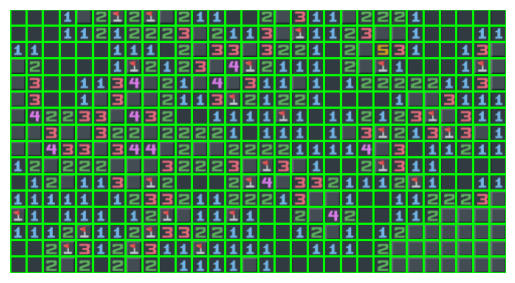

In [21]:
import cv2
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

# 加载图像
image_path = './crop_map.png'
image = cv2.imread(image_path)

# 获取图像的高度和宽度
height, width = image.shape[:2]

# 定义网格单元的数量
num_rows, num_cols = 16, 30

# 计算每个单元格的实际大小，使用浮动边界来处理整数除法问题
cell_height = height / num_rows
cell_width = width / num_cols

# 遍历每个网格单元并进行颜色检测
for row in range(num_rows):
    for col in range(num_cols):
        # 计算每个单元格的坐标，使用浮动边界
        x_start = int(col * cell_width)
        y_start = int(row * cell_height)
        x_end = int((col + 1) * cell_width)
        y_end = int((row + 1) * cell_height)

        # 确保不会超出图像范围（特别是右侧和底部的网格）
        x_end = min(x_end, width)
        y_end = min(y_end, height)

        # 截取每个单元格区域
        cell = image[y_start:y_end, x_start:x_end]

        # 将单元格重塑为一维数组，方便统计颜色
        pixels = cell.reshape(-1, 3)  # 每个像素的 BGR 值
        
        # 使用 Counter 统计颜色出现的次数
        color_count = Counter(map(tuple, pixels))
        
        # 获取出现次数最多的颜色
        most_common_color, most_common_count = color_count.most_common(1)[0]

        # 打印结果
        print(f"Cell ({row}, {col}) - 最多的颜色 (BGR格式): {most_common_color}, 出现次数: {most_common_count}")

        # 在原图上绘制矩形
        cv2.rectangle(image, (x_start, y_start), (x_end, y_end), (0, 255, 0), 2)  # 绘制绿色矩形，2是线宽

# 使用 matplotlib 显示图像
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # 转换为 RGB 以便 matplotlib 正确显示
plt.imshow(image_rgb)
plt.axis('off')  # 不显示坐标轴
plt.show()

# 可选：保存带有网格标记的图像
# cv2.imwrite('./output_with_grid.png', image)
